In [1]:
#|default_exp app

# Flood or no flood?

In [2]:
#|export
import gradio as gr
from fastai.vision.all import *

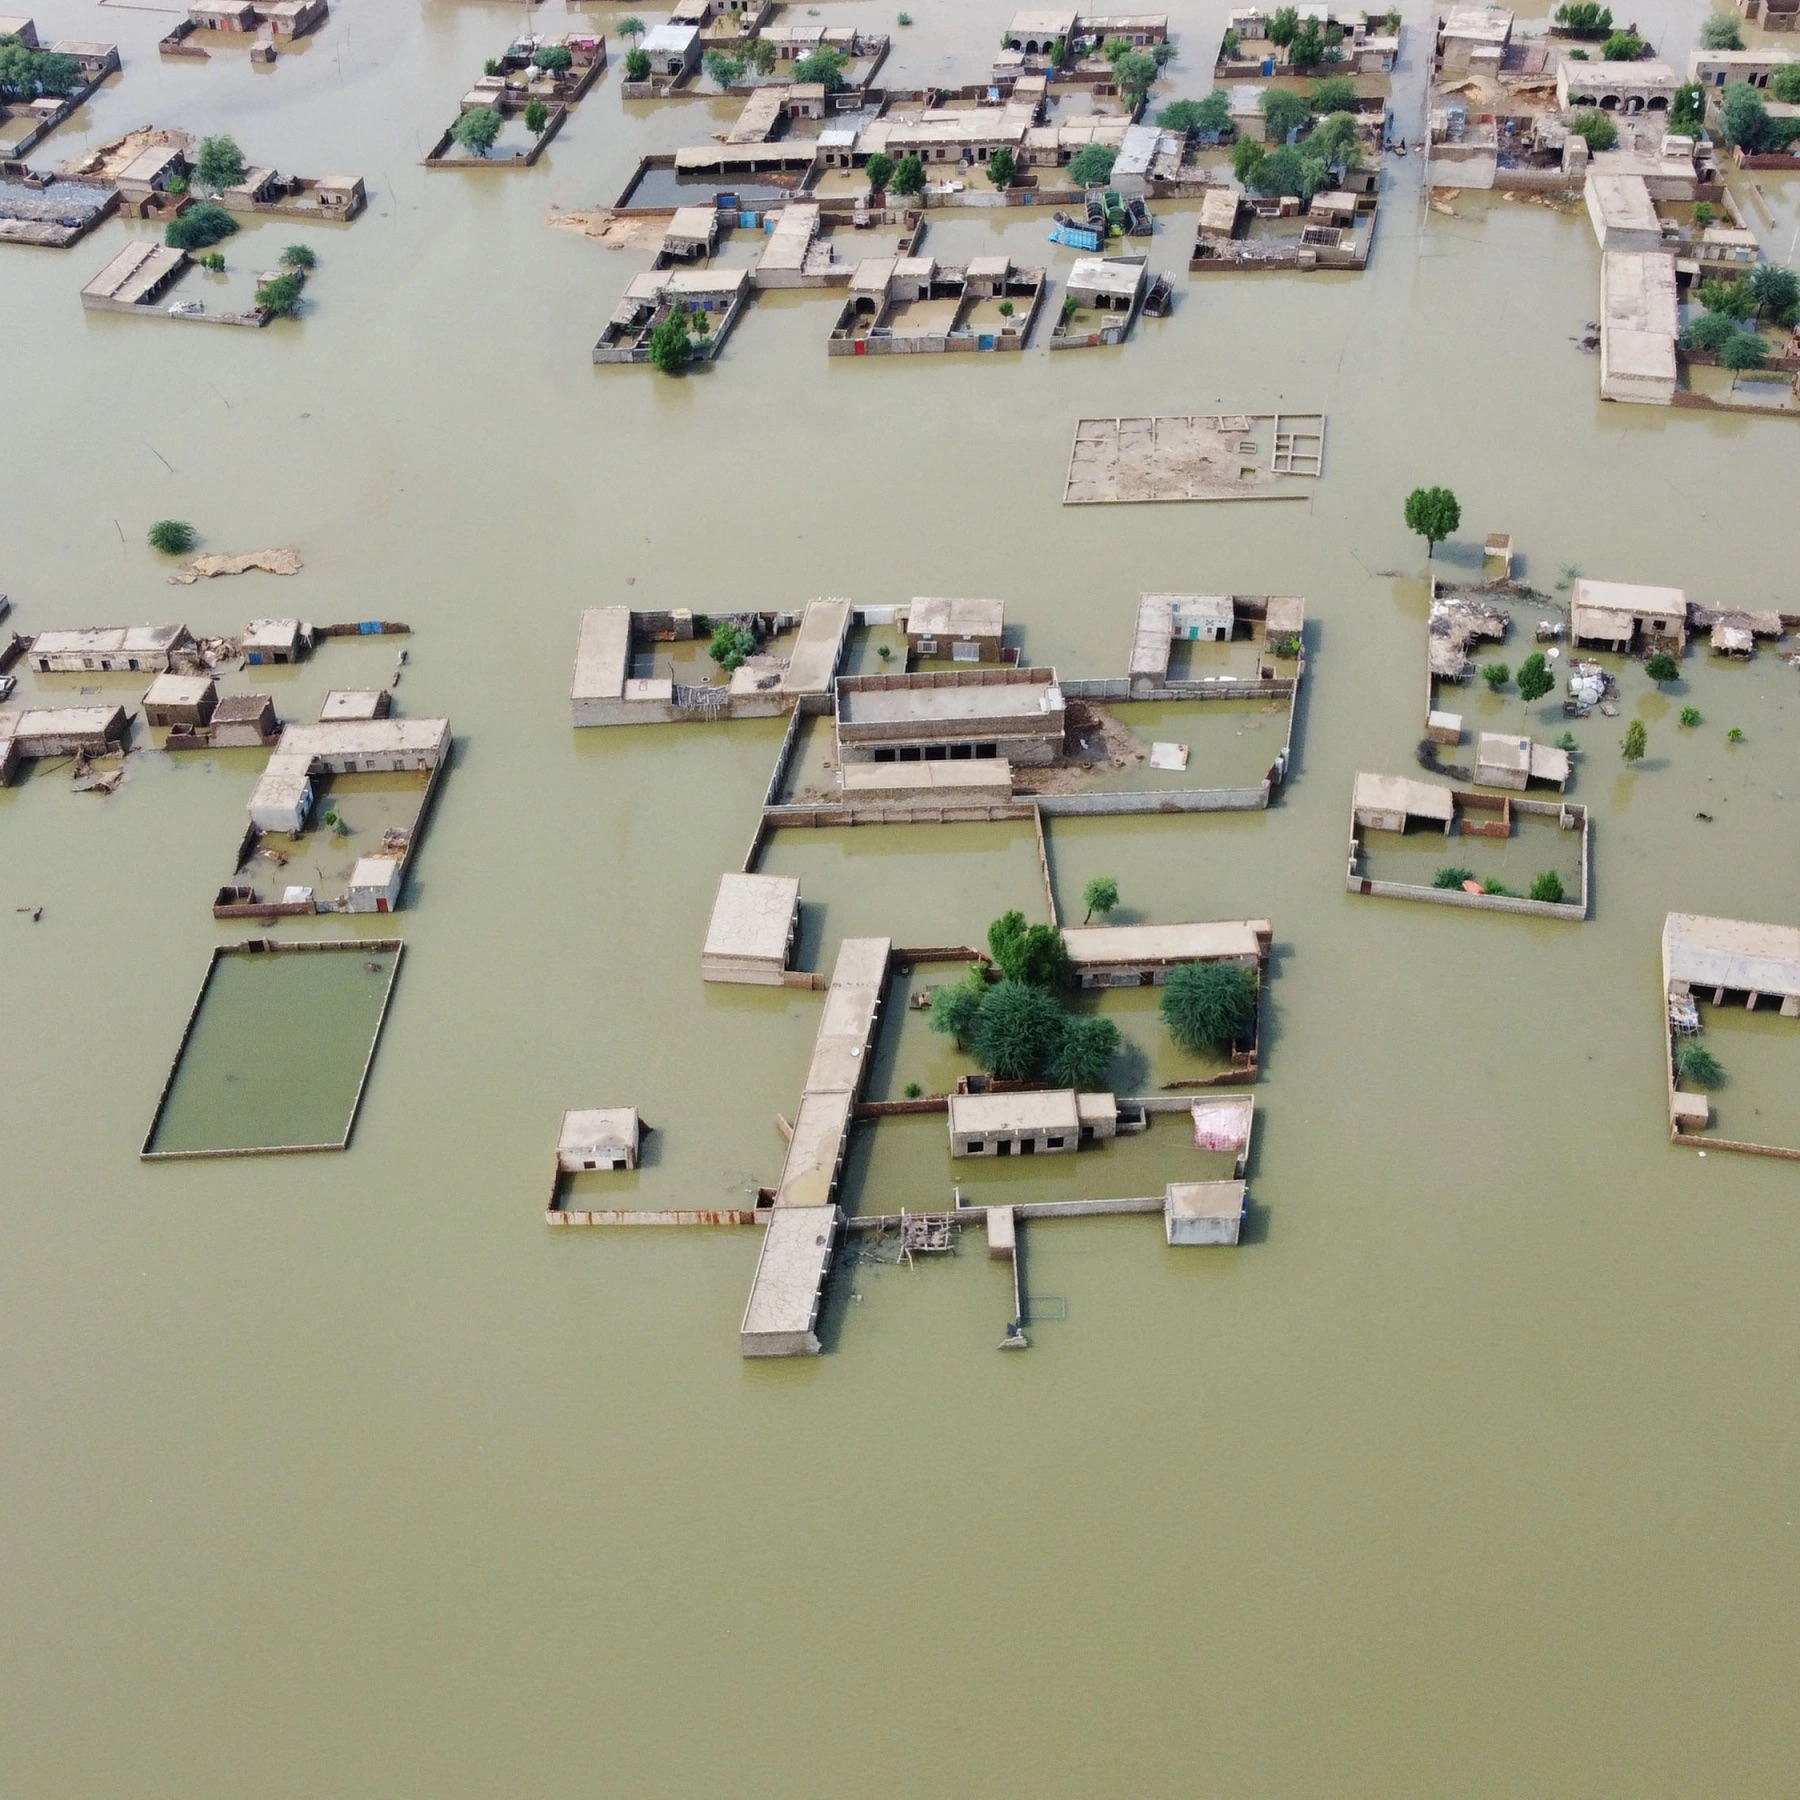

In [3]:
image = PILImage.create('images/test_images/1.jpeg'); image

## Create learner.

In [4]:
#|export

learner = load_learner('model/flood_classifier.pkl')

In [5]:
learner.predict(image)

('1', TensorBase(1), TensorBase([0.3966, 0.6034]))

## Create classification function.

In [6]:
#|export

categories = 'Not Flooded', 'Flooded',

def classify_image(image):
    prediction, index, probabilities = learner.predict(image)
    return dict(zip(categories, map(float, probabilities)))

In [7]:
classify_image(PILImage.create('images/example_images/flooded/1.jpeg'))

{'Not Flooded': 0.009118977934122086, 'Flooded': 0.9908809661865234}

## Intialize attributes for the interface.

In [29]:
#|export

image = gr.Image()
label = gr.Label()
examples = [str(image_path) for image_path in Path('images/example_images')
.rglob('*.jpeg')]

title = 'Flood Classifier'
description = "An image classifier that can tell whether an image is flooded " \
              "or not. Works well with images that have a top-down/aeiral " \
              "view of the land below." \
              "This model was trained on the ResNet18 architecture and the " \
              "fastai library." \
              "Check out the associated blog post with the link below!"
article = "<p style='text-align: center; font-size: 36px'><a " \
          "href='https://forbo7.github" \
          ".io/ForBlog/fastai/image%20classification/2022/09/12/Detecting" \
          "-Floods-for-Disaster-Relief.html' targets='_blank'>Blog Post</a></p>'"

In [9]:
examples

['images/example_images/iffy/7.jpeg',
 'images/example_images/iffy/2.jpeg',
 'images/example_images/not_flooded/2.jpeg',
 'images/example_images/flooded/1.jpeg',
 'images/example_images/flooded/2.jpeg']

## Create the interface.

In [28]:
#|export

# Perhaps I can make the interface below with **kwargs?
interface = gr.Interface(fn=classify_image, inputs='image', outputs='label',
                         examples=examples, title=title,
                         description=description, article=article)
interface.launch(inline=False, enable_queue=True)

Running on local URL:  http://127.0.0.1:7869

To create a public link, set `share=True` in `launch()`.


(<gradio.routes.App at 0x29d4a8040>, 'http://127.0.0.1:7869/', None)

## Export

In [30]:
from nbdev.export import nb_export

In [31]:
nb_export('app.ipynb', '.')